In [30]:
import numpy as np
import pandas as pd
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import joblib

In [31]:
# HYPERPARAMETERS

random_seed = 42
val_size = 0.05
batch_size =28
numChannels = 1
num_epochs = 25
learning_rate = 1e-3

In [32]:
df_train = pd.read_csv('final_datatset.csv')
df_train

,center_x,center_y,Thumb_status,Index_status,Middle_status,Ring_status,Pinky_status,DistanceThumbIndex,DistanceThumbMiddle,DistanceThumbRing,DistanceThumbPinky,DistanceIndexMiddle,DistanceIndexRing,DistanceIndexPinky,DistanceMiddleRing,DistanceMiddlePinky,DistanceRingPinky,Gesture_type
0,354,214,0,0,0,0,0,14.866069,46.097722,54.561891,55.542776,60.415230,68.963759,69.771054,8.602325,9.486833,2.828427,volume
1,348,215,0,0,0,0,0,10.295630,53.851648,59.135438,64.195015,61.465437,67.119297,72.090221,6.403124,10.816654,5.099020,volume
2,347,217,0,0,0,0,0,13.000000,56.320511,63.906181,67.357256,65.306967,73.355300,76.485293,8.485281,11.180340,4.123106,volume
3,346,217,0,0,0,0,0,10.198039,57.974132,65.459911,69.260378,63.158531,71.112587,74.732858,8.485281,11.661904,4.000000,volume
4,345,218,0,0,0,0,0,11.180340,57.489129,65.145990,68.680419,62.769419,71.112587,74.323617,9.219544,11.661904,4.123106,volume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,217,342,1,0,0,0,1,18.357560,14.035669,24.698178,102.727796,17.720045,31.384710,120.216471,13.892444,113.004425,112.378824,previous
975,189,334,1,0,0,0,1,23.853721,14.866069,28.231188,100.657836,15.033296,33.615473,123.761868,20.000000,114.634201,115.883562,previous
976,204,309,1,0,0,0,1,28.284271,18.384776,29.546573,96.829747,13.341664,32.756679,124.963995,21.470911,114.621115,113.635382,previous
977,196,290,1,0,0,0,1,27.202941,17.088007,27.313001,102.200783,16.000000,34.205263,128.425075,19.235384,118.713942,118.105885,previous


In [33]:
features = df_train.drop('Gesture_type',axis = 1)
targets = df_train['Gesture_type']
targets

0        volume
1        volume
2        volume
3        volume
4        volume
         ...   
974    previous
975    previous
976    previous
977    previous
978    previous
Name: Gesture_type, Length: 979, dtype: object

In [34]:
from torch.utils.data import Dataset, DataLoader
class Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [35]:
print(features.shape)
print(targets.shape)

(979, 17)
(979,)


In [36]:
train_features, val_features, train_targets, val_targets = train_test_split(features, targets, test_size=val_size,random_state=random_seed)                                                                       

In [37]:
print(train_features.shape)
print(val_features.shape)

(930, 17)
(49, 17)


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_features)
X_test = scaler.transform(val_features)
scaler_filename = 'phase1_scaler.pkl'
joblib.dump(scaler,scaler_filename)

['phase1_scaler.pkl']

In [39]:
X_train_tensor = torch.tensor(X_train,dtype=torch.float)
X_test_tensor = torch.tensor(X_test,dtype=torch.float)

In [40]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_targets)
joblib.dump(label_encoder,'label_encoderphase1.pkl')
y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_encoded= label_encoder.transform(val_targets)
y_test_tensor = torch.LongTensor(y_test_encoded)


In [41]:
from sympy import false


train_dataset = Dataset(X_train_tensor, y_train_tensor)
test_dataset = Dataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [42]:
class classifier(nn.Module):
    def __init__(self, in_features,out_features):
        super().__init__()
        self.relu = nn.ReLU()
        #layer 1
        self.layer_1 = nn.Linear(in_features, 32)
        self.batchnorm1 = nn.BatchNorm1d(32)
        self.dropout = nn.Dropout(0.2)

        #layer 2
        self.layer_2 = nn.Linear(32, 32)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.2)

        #layer 3

        self.layer_3 = nn.Linear(32, 7)
        self.batchnorm3 = nn.BatchNorm1d(7)
        self.dropout3 = nn.Dropout(0.2)
        
        #softmax

        self.logsoftmax = nn.LogSoftmax(dim=1)


    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.dropout3(x)
        x = self.relu(x)
        output = self.logsoftmax(x)
        return output
    
prediction = classifier(17, 7)
optimizer = torch.optim.AdamW(params=prediction.parameters(), lr=learning_rate, weight_decay=0.001)
loss_function = nn.NLLLoss()
from torchsummary import summary
summary(prediction, (17,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]             576
       BatchNorm1d-2                   [-1, 32]              64
           Dropout-3                   [-1, 32]               0
            Linear-4                   [-1, 32]           1,056
       BatchNorm1d-5                   [-1, 32]              64
              ReLU-6                   [-1, 32]               0
           Dropout-7                   [-1, 32]               0
            Linear-8                    [-1, 7]             231
       BatchNorm1d-9                    [-1, 7]              14
          Dropout-10                    [-1, 7]               0
             ReLU-11                    [-1, 7]               0
       LogSoftmax-12                    [-1, 7]               0
Total params: 2,005
Trainable params: 2,005
Non-trainable params: 0
-----------------------------------

In [43]:
#train
record = {
    "Train Loss": [],
    "Train Accuracy": [],
    "test Loss": [],
    "test Accuracy": []
}

from tqdm import tqdm
for e in tqdm(range(num_epochs)):
    prediction.train()

    steps_train = 0
    steps_test = 0
    tot_train_loss = 0
    tot_test_loss = 0
    train_correct = 0
    test_correct = 0


    for (x,y) in train_loader:
        #print(x.shape)
        pred = prediction(x)
        loss = loss_function(pred,y.long())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tot_train_loss += loss
        train_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        steps_train += 1

    with torch.no_grad():
        prediction.eval()

        for (x,y) in val_loader:
            pred = prediction(x)
            tot_test_loss += loss_function(pred,y.long())
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            steps_test += 1
    

    train_loss_per_batch = tot_train_loss/steps_train
    test_loss_per_batch = tot_test_loss/steps_test
    train_accuracy_in_epoch = 100*train_correct/len(train_loader.dataset)
    test_accuracy_in_epoch = 100*test_correct/len(val_loader.dataset)


    record["Train Loss"].append(train_loss_per_batch.cpu().detach().numpy())
    record["Train Accuracy"].append(train_accuracy_in_epoch)
    record["test Loss"].append(test_loss_per_batch.cpu().detach().numpy())
    record["test Accuracy"].append(test_accuracy_in_epoch)

    print(f"Epoch: {e}/{num_epochs}")
    print(f"Train Loss: {train_loss_per_batch:.6f}, Train Accuracy: {train_accuracy_in_epoch:.6f}")
    print(f"test Loss: {test_loss_per_batch:.6f}, test Accuracy: {test_accuracy_in_epoch:.6f}")
    print("***************************************************************************")
    

  4%|▍         | 1/25 [00:00<00:02,  9.92it/s]

Epoch: 0/25
Train Loss: 1.580144, Train Accuracy: 41.827957
test Loss: 1.108218, test Accuracy: 75.510204
***************************************************************************
Epoch: 1/25
Train Loss: 1.165368, Train Accuracy: 62.903226
test Loss: 0.969909, test Accuracy: 79.591837
***************************************************************************


 12%|█▏        | 3/25 [00:00<00:01, 13.42it/s]

Epoch: 2/25
Train Loss: 1.012114, Train Accuracy: 69.569892
test Loss: 0.750651, test Accuracy: 100.000000
***************************************************************************
Epoch: 3/25
Train Loss: 0.898659, Train Accuracy: 76.774194
test Loss: 0.627668, test Accuracy: 100.000000
***************************************************************************


 20%|██        | 5/25 [00:00<00:01, 15.54it/s]

Epoch: 4/25
Train Loss: 0.824743, Train Accuracy: 78.924731
test Loss: 0.520375, test Accuracy: 100.000000
***************************************************************************
Epoch: 5/25
Train Loss: 0.799547, Train Accuracy: 78.172043
test Loss: 0.480535, test Accuracy: 100.000000
***************************************************************************


 28%|██▊       | 7/25 [00:00<00:01, 15.91it/s]

Epoch: 6/25
Train Loss: 0.752471, Train Accuracy: 77.956989
test Loss: 0.463052, test Accuracy: 100.000000
***************************************************************************


 36%|███▌      | 9/25 [00:00<00:01, 14.10it/s]

Epoch: 7/25
Train Loss: 0.751623, Train Accuracy: 78.709677
test Loss: 0.426948, test Accuracy: 100.000000
***************************************************************************
Epoch: 8/25
Train Loss: 0.705207, Train Accuracy: 79.139785
test Loss: 0.413475, test Accuracy: 100.000000
***************************************************************************
Epoch: 9/25
Train Loss: 0.710678, Train Accuracy: 79.032258
test Loss: 0.388155, test Accuracy: 100.000000
***************************************************************************


 44%|████▍     | 11/25 [00:00<00:00, 14.35it/s]

Epoch: 10/25
Train Loss: 0.702936, Train Accuracy: 77.849462
test Loss: 0.338243, test Accuracy: 100.000000
***************************************************************************
Epoch: 11/25
Train Loss: 0.762424, Train Accuracy: 75.698925
test Loss: 0.339029, test Accuracy: 100.000000
***************************************************************************
Epoch: 12/25
Train Loss: 0.672990, Train Accuracy: 79.462366
test Loss: 0.334909, test Accuracy: 100.000000
***************************************************************************


 52%|█████▏    | 13/25 [00:00<00:00, 15.20it/s]

Epoch: 13/25

 60%|██████    | 15/25 [00:01<00:00, 15.02it/s]


Train Loss: 0.709871, Train Accuracy: 77.634409
test Loss: 0.322574, test Accuracy: 100.000000
***************************************************************************
Epoch: 14/25
Train Loss: 0.658410, Train Accuracy: 80.215054
test Loss: 0.292096, test Accuracy: 100.000000
***************************************************************************
Epoch: 15/25
Train Loss: 0.656672, Train Accuracy: 79.247312
test Loss: 0.303968, test Accuracy: 100.000000
***************************************************************************


 76%|███████▌  | 19/25 [00:01<00:00, 14.45it/s]

Epoch: 16/25
Train Loss: 0.646692, Train Accuracy: 80.107527
test Loss: 0.262031, test Accuracy: 100.000000
***************************************************************************
Epoch: 17/25
Train Loss: 0.655675, Train Accuracy: 78.709677
test Loss: 0.269043, test Accuracy: 100.000000
***************************************************************************
Epoch: 18/25
Train Loss: 0.648456, Train Accuracy: 78.494624
test Loss: 0.251674, test Accuracy: 100.000000
***************************************************************************
Epoch: 19/25
Train Loss: 0.653862, Train Accuracy: 78.279570
test Loss: 0.237738, test Accuracy: 100.000000
***************************************************************************


 92%|█████████▏| 23/25 [00:01<00:00, 14.06it/s]

Epoch: 20/25
Train Loss: 0.654754, Train Accuracy: 77.849462
test Loss: 0.228678, test Accuracy: 100.000000
***************************************************************************
Epoch: 21/25
Train Loss: 0.569739, Train Accuracy: 82.043011
test Loss: 0.230341, test Accuracy: 100.000000
***************************************************************************
Epoch: 22/25
Train Loss: 0.580366, Train Accuracy: 81.182796
test Loss: 0.224665, test Accuracy: 100.000000
***************************************************************************


100%|██████████| 25/25 [00:01<00:00, 13.98it/s]

Epoch: 23/25
Train Loss: 0.626599, Train Accuracy: 77.956989
test Loss: 0.201607, test Accuracy: 100.000000
***************************************************************************
Epoch: 24/25
Train Loss: 0.632545, Train Accuracy: 76.344086
test Loss: 0.198893, test Accuracy: 100.000000
***************************************************************************


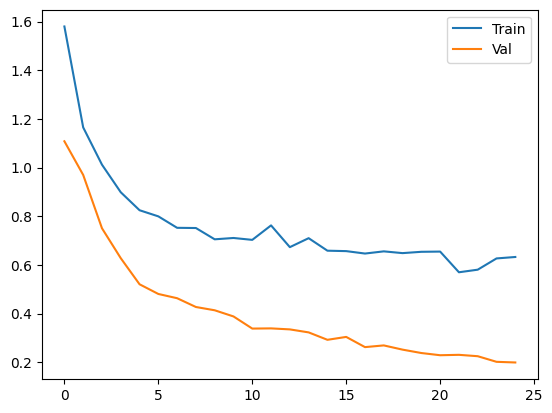

In [44]:
from matplotlib import pyplot as plt
plt.plot(record["Train Loss"], label="Train")
plt.plot(record["test Loss"], label = "Val")
plt.legend()

In [45]:
model_path = "gesture_classifier.pth"
torch.save(prediction.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to gesture_classifier.pth
